### Globally e-Commerce companies face many challenges. One such challenge is to correctly determine the strong & weak areas to strengthen the company and boost up the revenue.
### On that note, let us take a sample data and try to figure out whether that specific company should focus on its mobile app experience or its website. 

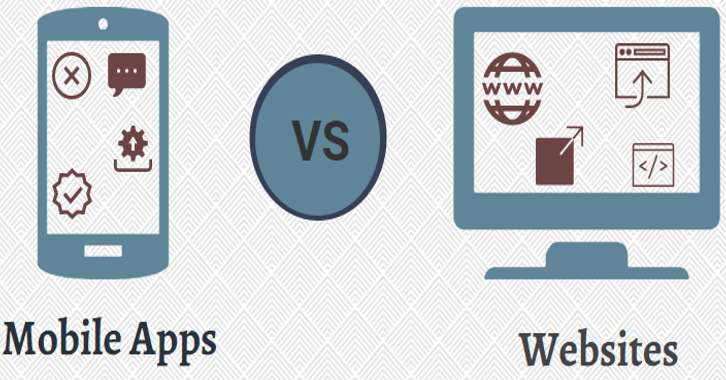

### Importing libraries

In [59]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### Loading data

In [60]:
data = pd.read_csv(r"C:\Users\Use\Desktop\Internships\eCommerce\Ecommerce Customers.csv")

### Check out top 5 customer details, their info() and describe() methods.

In [61]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [62]:
data.shape

(500, 8)

In [63]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


### Observation

    This dataset contains customer basic details and their time spent in company's app and website. It also has membership   length and amount of money spent by them yearly. Email, Address, Fictional avatar are some of the categorical variables and following are numerical attributes
    
    Avg. Session Length: Average session of in-store style advice sessions.
    Time on App: Average time spent on App in minutes
    Time on Website: Average time spent on Website in minutes
    Length of Membership: How many years the customer has been a member.

In [65]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Exploratory Data Analysis

For the rest of the project, we'll be focussing on numerical values of the dataset



#### Firstly, let's view the relationship between each and every column of dataset randomly using pairplot()

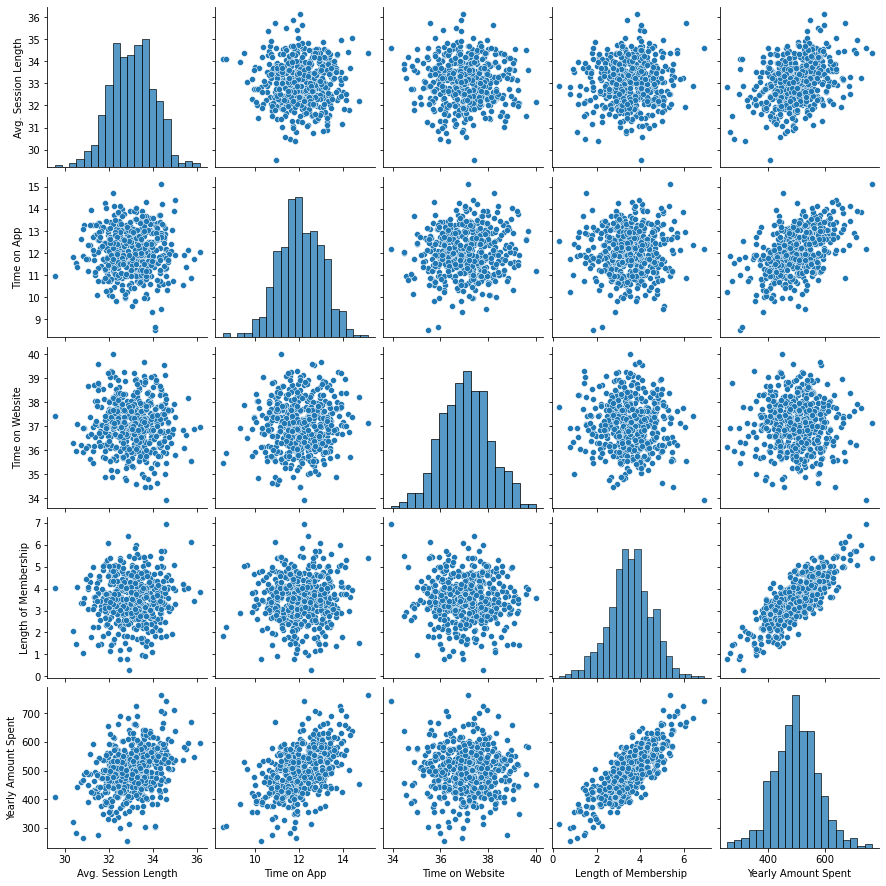

In [66]:
sns.pairplot(data)

#### It is evident that customers who have long term membership spends more amount in total. So. let's analyse further by creating a linear plot model.

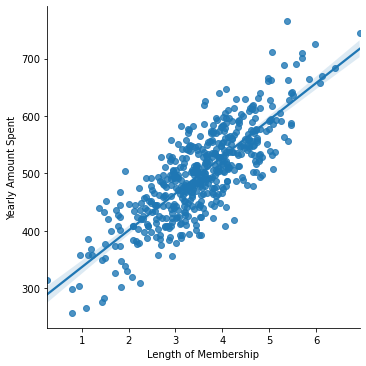

In [71]:
sns.lmplot(x="Length of Membership", y="Yearly Amount Spent",data=data)


#### It is once again confirmed that there is a strong correlation between Length of Membership and Yearly Amount Spent and that too in a positive direction

###  Further let's see if any correlation exists between Time on Website and Yearly Amount Spent Columns

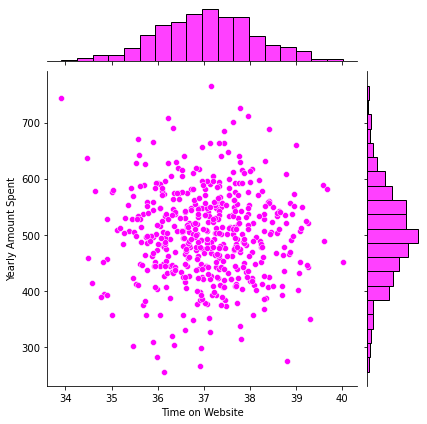

In [69]:
sns.jointplot(x="Time on Website", y="Yearly Amount Spent",data=data, color = 'magenta')



### Find if any correlation exists between Time on App and Yearly Amount Spent Columns

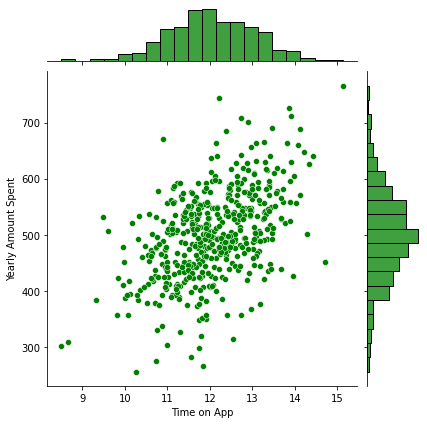

In [70]:
sns.jointplot(x="Time on App", y="Yearly Amount Spent",data=data, color = 'g')



#### Above 2 plots shows that former doesnot give clear picture whereas latter plot slightly shows its linearity and the attributes are directly proportional.

### Training & Testing Data

As we have performed enough exploration on dataset let's go ahead and split the dataset into train and test data. Yearly amount spent is the target variable.

In [72]:
X = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = data[['Yearly Amount Spent']]

Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training the model

In [74]:
#Import LinearRegression

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [81]:
#Print co-efficients of the model

print(model.coef_)


[[25.98154972 38.59015875  0.19040528 61.27909654]]


### Predicting Test Data

##### As we have fit our model let's evaluate its performance by predicting the test values

In [76]:
predictions = model.predict(X_test)

Text(0, 0.5, 'predicted')

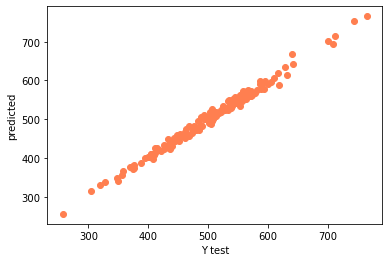

In [77]:
# Real test values Vs Predicted Values

plt.pyplot.scatter(y_test, predictions, color="coral")
plt.pyplot.xlabel('Y test')
plt.pyplot.ylabel('predicted')


### Model Evaluation

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

In [78]:
import sklearn.metrics as metrics
print('MAE: {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('MSE: {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('RMSE: {}'.format(np.sqrt(metrics.mean_squared_error(y_test, predictions))))

MAE: 7.228148653430838
MSE: 79.81305165097451
RMSE: 8.933815066978637


### Lower the error values, higher the performance of the model

The aim of this project is not yet overed. Let's figure out the answer to the original question, do we focus our efforts on mobile app or website development? 

In [92]:
model.coef_

array([[25.98154972, 38.59015875,  0.19040528, 61.27909654]])

### Conclusion

    It is understood that Time on App is a much more significant factor than Time on Website. Now the company has a choice: they could either focus all the attention into the App as that is what is bringing the most money in, or they could      focus on the Website as it is performing so poorly!